## Вариант 9##
Маятник – тело с массой 1 кг, моментом инерции относительно оси a $кг∙м^2$, центр его тяжести находится на расстоянии 5 см от оси, момент силы трения в оси пропорционален угловой скорости вращения с коэффициентом 1;

$$I{d^2\over dt^2}\theta = mgL\theta + M + M^{тр}$$
$$mL^2{d^2\over dt^2}\theta = mgL\theta + M + {d\over dt}\theta$$
$$ (mL^2p^2+p-mgL)\theta = M $$


In [62]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [107]:
m = 1
g = 9.81
a = 1.001/400 # a >= 1/400
I = a
mass_center_distance = 0.05
L = np.sqrt(I/m)
init_angle = np.arccos(mass_center_distance/L)

In [108]:
init_angle*180/np.pi, L

(1.8112480473277617, 0.05002499375312305)

In [120]:
dT = 0.1
TotalTime = 20
Tin = np.linspace(0, TotalTime, TotalTime/dT + 1)
sys_tf = signal.TransferFunction([1], [m*L**2, 1, -m*g*L])

print(sys_tf)

TransferFunctionContinuous(
array([399.6003996]),
array([   1.        ,  399.6003996 , -196.10197351]),
dt: None
)


/home/konstantin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


In [121]:
sys_tf = signal.tf2ss([1], [m*L**2, 1, -m*g*L])
print(sys_tf)

(array([[-399.6003996 ,  196.10197351],
       [   1.        ,    0.        ]]), array([[1.],
       [0.]]), array([[  0.       , 399.6003996]]), array([[0.]]))


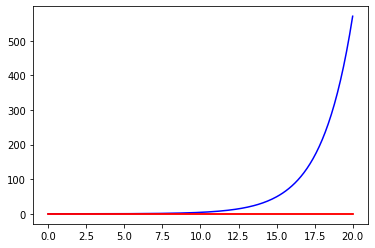

In [122]:
zero_input = np.zeros(Tin.shape) # не будем прилагать момент
# start_pos = 1/180.0*np.pi        # начнём с позиции в 1°.
Tout,yout,xout = signal.lsim(sys_tf, zero_input, Tin, X0=[0, init_angle/399.6])# начальная скорость нулевая, угол - start_pos
plt.plot(Tout, yout, 'b')
# покажем предельные допустимые отклонения красными линиями
limit = 15 / 180.0 * np.pi
plt.plot([0, TotalTime], [limit, limit], 'r')
plt.plot([0, TotalTime], [-limit, -limit], 'r')
plt.show()

In [123]:
P = 1
I = 0
D = 0
PID_num = [D, P, I]
PID_den = [1, 0]
interm_num = np.convolve([1], PID_num)
interm_den = np.convolve([m*L**2, 1, -m*g*L], PID_den)
total_sys = signal.tf2ss(interm_num, np.polyadd(interm_den, interm_num))
print(total_sys)

(array([[-399.6003996 , -203.49842609,   -0.        ],
       [   1.        ,    0.        ,    0.        ],
       [   0.        ,    1.        ,    0.        ]]), array([[1.],
       [0.],
       [0.]]), array([[  0.       , 399.6003996,   0.       ]]), array([[0.]]))


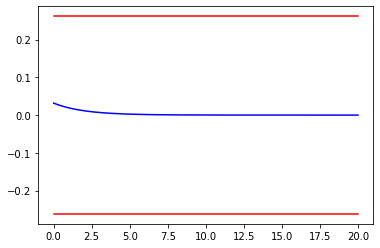

In [125]:
Tout,yout,xout = signal.lsim(total_sys, 
                             zero_input, 
                             Tin, 
                             X0=[0,init_angle/399.6, 0])# начальная скорость нулевая, угол - start_pos
plt.plot(Tout, yout, 'b')
# покажем предельные допустимые отклонения красными линиями
limit = 15 / 180.0 * np.pi
plt.plot([0, TotalTime], [limit, limit], 'r')
plt.plot([0, TotalTime], [-limit, -limit], 'r')
plt.show()